## Tyler Smith 
## 826005315
## ECEN 489 - Applied Data Science
## Homework 2

Libraries =>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
sns.set()

We are given unit variance (1) and zero mean 
Below the irreducible error is calculated

In [2]:
#Initializing the random error
mean, std = 0,1
#Number of values being tested
count = 3
#Creating the random error distribution
E = np.random.normal(mean, std, count)
#Values of the error at given instances
print('Irreducible Error at the 3 points',E)

Irreducible Error at the 3 points [-1.2143949  -1.5716329   2.85857419]


## 1) - A 
Y = f(X) + E is the general form of a quantitive response for Y
therefore the regression function f(X) = 1 + X, given that the model of 
Y = 1 + X + E.
***

In [3]:
#creating x = 1,2,..count
X = np.arange(1,count+1,1,dtype=float)
#initializing Y
Y = np.zeros(count,dtype=float)
print('X = ',X)
#Generating the model of Y = 1 + X + E
for i in range(0, count):
    Y[i] = 1 + X[i] + E[i]
print('Y = ', Y)

X =  [1. 2. 3.]
Y =  [0.7856051  1.4283671  6.85857419]


## 1) - B

Below I will show fitting the data to a 0th degree regression

Text(0.5, 1.0, 'Zero degree regression')

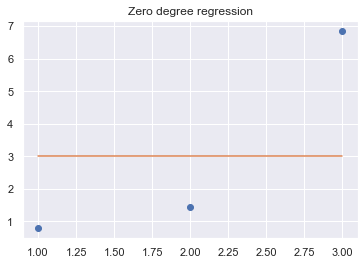

In [4]:
#This funtion produces a polynomial to fit to 0th degree
B_0_zero_degree = np.polyfit(X,Y,0)
#Plotting the scatterplot of the original data
plt.plot(X,Y,'o')
#Plotting the 0th degree regression
plt.plot(X,X*0 + B_0_zero_degree)
plt.title('Zero degree regression')

Below I will show fitting the data to a 1st degree regression

B_0 first degree =  -3.048786956883492
B_1 first degree =  3.036484542831828


Text(0.5, 1.0, 'First degree regression')

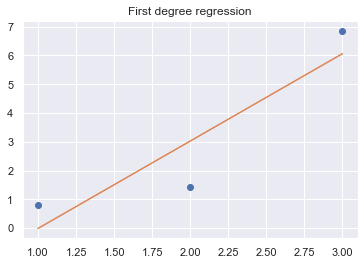

In [5]:
#generating the coefficents of the first order regresison
[B_1_1st,B_0_1st] = np.polyfit(X,Y,1)
#printing the coeggicents
print('B_0 first degree = ', B_0_1st )
print('B_1 first degree = ', B_1_1st)
#plotting the original data
plt.plot(X,Y,'o')
#potting the regression
plt.plot(X,(X * B_1_1st + B_0_1st))
plt.title('First degree regression')

Below I will shot fitting the data to a 2nd degree regression

B_0 second degree =  4.93028819288298
B_1 second degree =  -6.538405636887934
B_2 second degree =  2.393722544929941


Text(0.5, 1.0, 'Second Degree Regression')

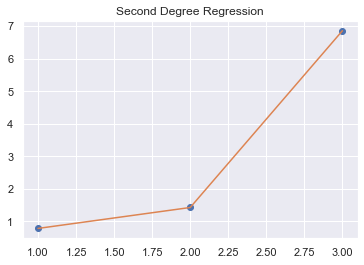

In [6]:
#Generating the second degree regression
[B_2_2nd, B_1_2nd, B_0_2nd] = np.polyfit(X,Y,2)
#Printing the coefficents
print('B_0 second degree = ', B_0_2nd)
print('B_1 second degree = ', B_1_2nd)
print('B_2 second degree = ', B_2_2nd)
#Plotting the original data
plt.plot(X,Y,'o')
#Ploting the regression
plt.plot(X,((X**2) * B_2_2nd + X * B_1_2nd + B_0_2nd))
plt.title('Second Degree Regression')

Now computing the training error of the 2nd model

In [7]:
Y_predicted = np.zeros(count,dtype=float)
training_error = 0
for i in range(0,count):
    Y_predicted[i] = ((X[i]**2) * B_2_2nd) + (X[i] * B_1_2nd) + (B_0_2nd)
    print ('Y predicted = ',Y_predicted[i])
    print ('Y real', Y[i])
    training_error = training_error + (Y_predicted[i]-Y[i])**2
    if i == (count-1):
        training_error = training_error / count
print('training error for M2 = ', training_error)


Y predicted =  0.785605100924986
Y real 0.7856051009249807
Y predicted =  1.4283670988268753
Y real 1.428367098826871
Y predicted =  6.858574186588644
Y real 6.858574186588637
training error for M2 =  3.222825489871675e-29


## 1) - C
Now creating the 1000 different test cases, This is just the Y and irreducible error vlaues.
I will stores vlaues momentarily in arrays while computing them and then place them inside of a 
dataframe for ease of use later on

In [8]:
#This dataframe will store all the computed values for the response variable and training sets 
test_cases = pd.DataFrame(index = np.arange(0,1000),
                          columns = [
                          'E_1',
                          'E_2',
                          'E_3',
                          'Y_1',
                          'Y_2',
                          'Y_3',
                          'M_0_0th',
                          'M_0_1st',
                          'M_0_2nd',
                          'M_1_1st',
                          'M_1_2nd',
                          'M_2_2nd', 
                          'training error 0 degree',
                          'training error 1 degree',
                          'training error 2 degree',
                          
                          ])

#These are initialization values 

#This set amount determines the number of training sets used
set_amount = 1000
#This array is used for storing the 3 points of the irreducible error 1000 times (1000x3)
irreducible_error = np.zeros((set_amount,3), dtype = float)
#This array will be used for storing the real Y values 
Y_real = np.zeros((set_amount,3), dtype = float)

#This loop will calculate the Y and irreducible error values 1000 times
for i in range(0,set_amount):
    #The irreducible error is calculated 1000 times and stored into a temporary array 
    irreducible_error[i,:]  = np.random.normal(mean, std, count)
    #Calculating Y for 1000 different cases 
    for n in range(0,count):
        Y_real[i,n] = X[n] + 1 + irreducible_error[i,n]
        
#print(Y_real)   


Now the constants for the regresisons will be calculated and stored in arrays 

In [9]:
#initiating arrays to store the constants of the regressions
#0th degree 
cnst_0 = np.zeros(set_amount, dtype = float)
#1st degree
cnst_1 = np.zeros((set_amount,2), dtype = float) 
#2nd degree
cnst_2 = np.zeros((set_amount,3), dtype = float)

Calculating the regressions

In [10]:
#This will run for all training sets
for i in range(0,set_amount):
    #calculating 0th degree constant(s)
    cnst_0[i] = np.polyfit(X,Y_real[i,:],0) #b0_0
    #calculating 1st degree constant(s)
    cnst_1[i,:] = np.polyfit(X,Y_real[i,:],1) #b1_1, b0_1
    #calculating 2nd degree constant(s)
    cnst_2[i,:] = np.polyfit(X,Y_real[i,:],2) #b2_2, b1_2, b0_2
print(cnst_2[1,:])
print(cnst_2[1,0])

[-0.46077423  2.37601528  0.29518309]
-0.46077423315219573


Computing the training errors for each regression for all training sets

In [11]:
#temporary arrays for training error and X = 5 estimations
TE_0th = np.zeros(1000, dtype = float)
TE_1st = np.zeros(1000, dtype = float)
TE_2nd = np.zeros(1000, dtype = float)
est_5_0 = np.zeros(1000,dtype = float)
est_5_1 = np.zeros(1000,dtype = float)
est_5_2 = np.zeros(1000,dtype = float)
for i in range(0,set_amount):
    #####################
    #Estimating X = 5 for the different regressions
    est_5_0[i] = 0*5 + cnst_0[i]
    est_5_1[i] = (cnst_1[i,0]*5 + cnst_1[i,1])
    est_5_2[i] = ((cnst_2[i,0]*(25)) + (cnst_2[i,1]*5) + cnst_2[i,2])
    #####################
    
    #Computing the training errors
    for n in range(0,count):
        #######################
        #training error for 0th 
        #######################
        TE_0th[i] = TE_0th[i] + (Y_real[i,n] - (0*X[n] + cnst_0[i]))**2
        #######################
        #training error for 1st
        TE_1st[i] = TE_1st[i] + (Y_real[i,n] - (cnst_1[i,0]*X[n] + cnst_1[i,1]))**2
        #######################
        #training error for 2nd
        #######################
        TE_2nd[i] = TE_2nd[i] + (Y_real[i,n] - ((cnst_2[i,0]*(X[n]**2)) + (cnst_2[i,1]*X[n]) + cnst_2[i,2]))**2
        ######################
        
    TE_0th[i] = TE_0th[i]/count
    TE_1st[i] = TE_1st[i]/count
    TE_2nd[i] = TE_2nd[i]/count

  



# 1) - D

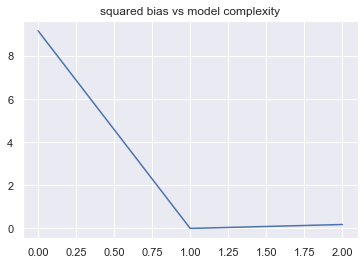

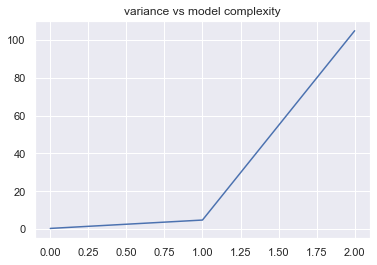

Text(0.5, 1.0, 'Irreducible error')

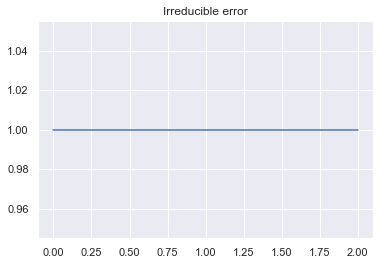

In [12]:
#Initializing values
mu_0 = 0
mu_1 = 0
mu_2 = 0
#Computing the mean of the model estimations at X = 5
for i in range(0,set_amount):
    mu_0 = mu_0 + est_5_0[i]
    mu_1 = mu_1 + est_5_1[i]
    mu_2 = mu_2 + est_5_2[i]
mu_0 = mu_0/set_amount
mu_1 = mu_1/set_amount
mu_2 = mu_2/set_amount

f_5 = 6  
bias = np.zeros(3,dtype = float)
bias[0] = (f_5 - mu_0)**2
bias[1] = (f_5 - mu_1)**2
bias[2] = (f_5 - mu_2)**2

plt.plot([0,1,2],bias)
plt.title('squared bias vs model complexity')
plt.show()

variance = np.zeros(3,dtype = float)
variance[0] = np.var(est_5_0)
variance[1] = np.var(est_5_1)
variance[2] = np.var(est_5_2)

plt.plot([0,1,2],variance)
plt.title('variance vs model complexity')
plt.show()

Var_IE = np.array([1,1,1],dtype = float)
plt.plot([0,1,2],Var_IE)
plt.title('Irreducible error')

# 1) - E

In [13]:

difference =np.zeros((set_amount,3), dtype = float)
#print(mean)
#print(std)

diff_0 = np.zeros(1000,dtype = float)
diff_1 = np.zeros(1000,dtype = float)
diff_2 = np.zeros(1000,dtype = float)

for i in range(0,set_amount):
    IE_f5 = np.random.normal(mean, std, 5)
    Y_5 = 6 + IE_f5[4]
    diff_0[i] = (Y_5 - est_5_0[i])**2  
    diff_1[i] = (Y_5 - est_5_1[i])**2
    diff_2[i] = (Y_5 - est_5_2[i])**2
mse_0 = np.mean(diff_0)    
mse_1 = np.mean(diff_1)
mse_2 = np.mean(diff_2) 
#print(mse_0, mse_1, mse_2)

# 1) - F

In [14]:
bias_var_ie = np.zeros(3, dtype = float)
for i in range(0,3):
    bias_var_ie[i] = bias[i] + variance[i] + 1
    print('right side for order',i,'=',bias_var_ie[i])
#plt.plot([0,1,2], bias_var_ie)
print('left side for order 0 =', mse_0)
print('left side for order 1 =', mse_1)
print('left side for order 2 =', mse_2)

right side for order 0 = 10.500709204405995
right side for order 1 = 5.755096439789396
right side for order 2 = 106.13246330849451
left side for order 0 = 10.970136586837238
left side for order 1 = 5.637923585456388
left side for order 2 = 106.61125208126232


# 2)
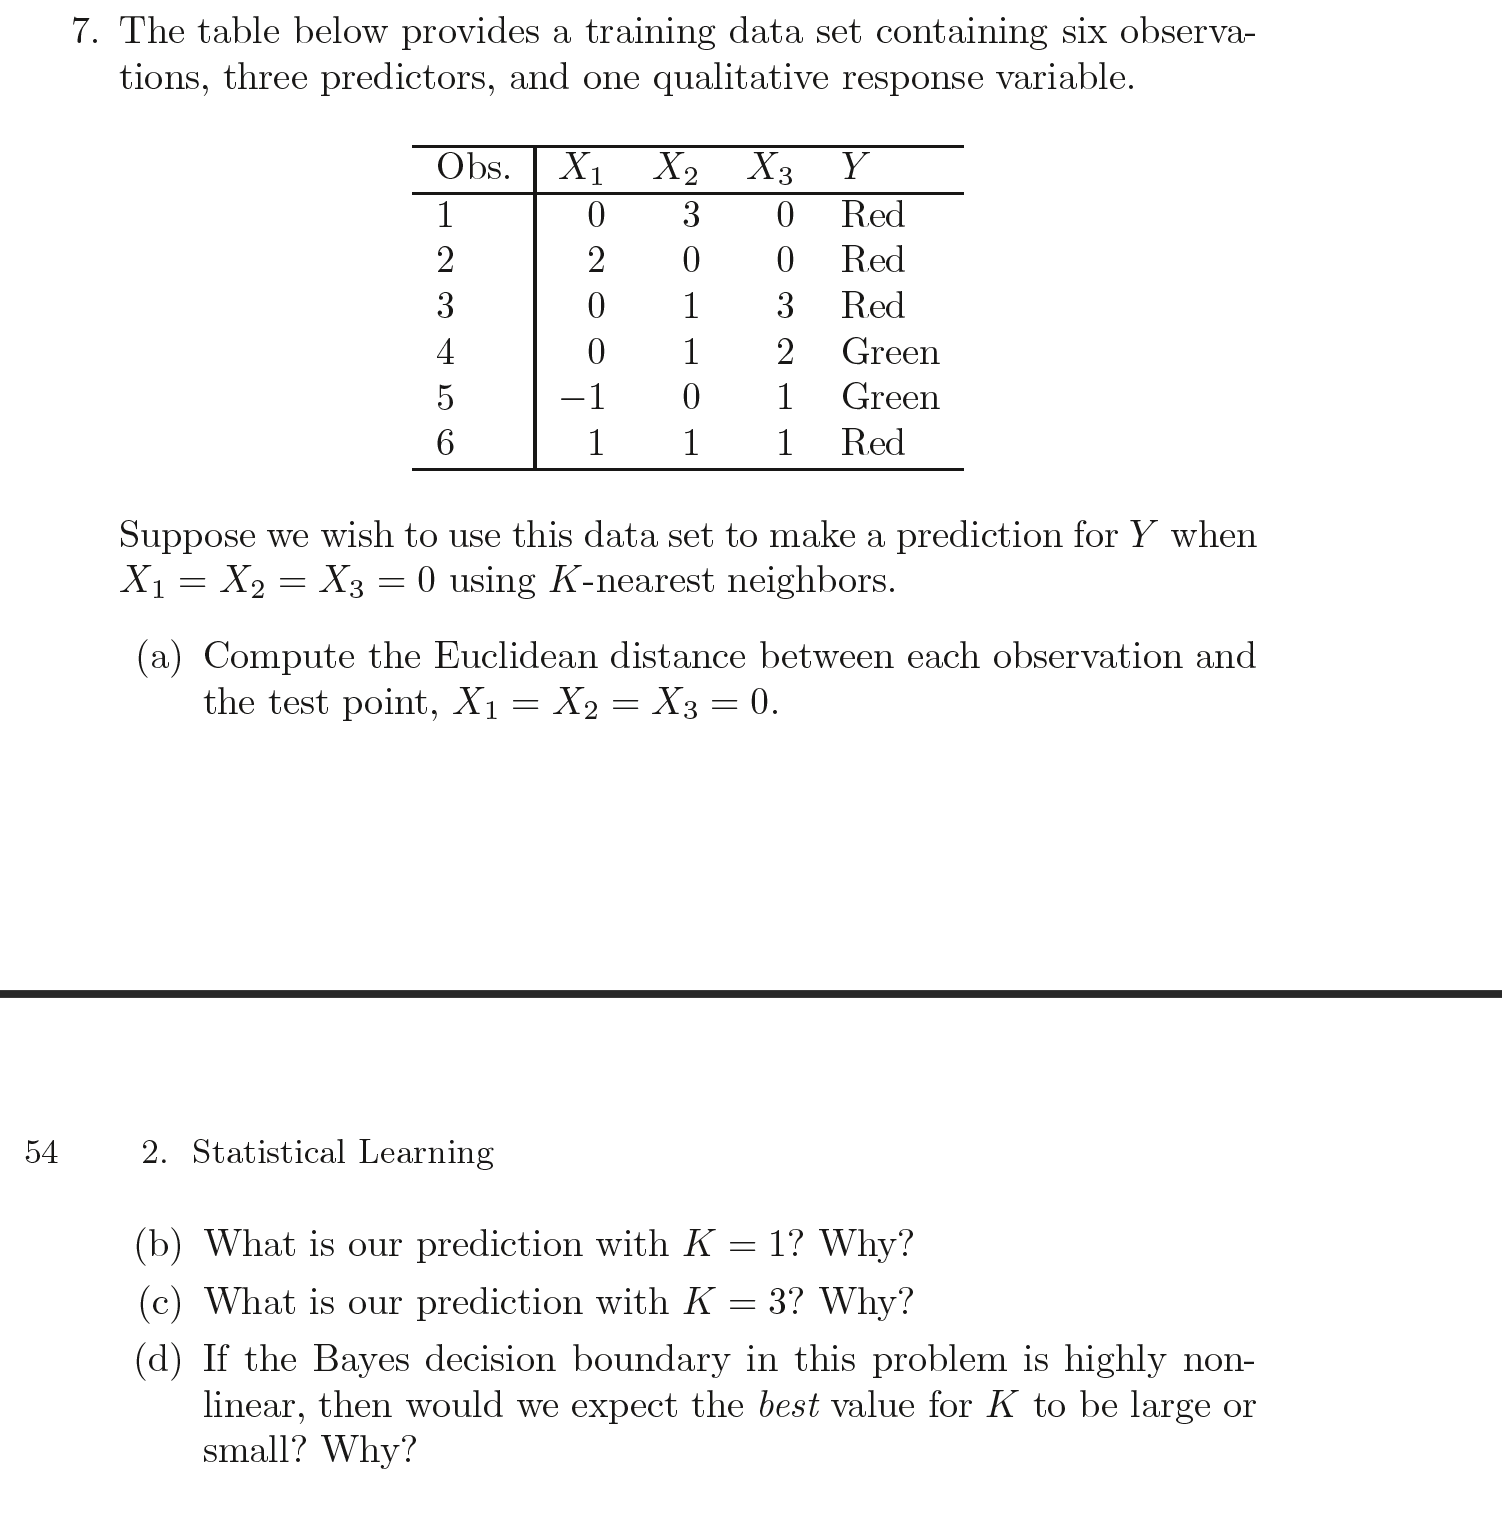

# A
Obs 1. dist = ((0-0)^2 + (3-0)^2 + (0-0)^2)^0.5 = 3

Obs 2. dist = ((2-0)^2 + (0-0)^2 + (0-0)^2)^0.5 = 2 

Obs 3. dist = ((0-0)^2 + (1-0)^2 + (3-0)^2)^0.5 = 3.162 

Obs 4. dist = ((0-0)^2 + (1-0)^2 + (2-0)^2)^0.5 = 2.236 

Obs 5. dist = ((0-1)^2 + (0-0)^2 + (1-0)^2)^0.5 = 1.414

Obs 6. dist = ((1-0)^2 + (1-0)^2 + (1-0)^2)^0.5 = 1.732 
# B
If K = 1, we know that the test point is at (0,0,0) and we must have it get the 1st nearest neighbor which the closest is obs 5 which is 1.414 away. We can then assume that with K = 1, Y will go towards green which obs 5 is.
# C
If K = 3, we must look at the 3 nearest neighbors to (0,0,0) which will have the lowest euclidean distances, those are obs 2, 5, and 6. The colors of those are 2 = red, 5 = green, and 6 = red. Therefore it is safe to assume that Y would be red since the majority of its nearest neightbors are red.
# D
We can see that the Bayes boundary would make it where increasing the K value would increase the spread of the values that the expected Y value would take. That would mean that it would not be benificial to increase K, so a smaller K value would serve a better purpose. 